In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

import xgboost
import time
import math
import random

from model_wrapper import (
    SKLearnModelWrapper,
    ModelWrapper
)

## LEARNING RATE ###
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve

In [2]:
class BoostRegression(SKLearnModelWrapper): 
    # MODIFIED TO TAKE in X, Y when initializing
    def __init__(self, X, Y, *args, debug=False, **kwargs):
        self.X = X
        # when debugging only use a tiny subset of the data
        if debug:
            self.X = self.X[:10]
        self.Y = Y
        
    def get_model(self):
        return xgboost.XGBRegressor(n_estimators=100, max_depth=6)

In [3]:
##########################
## SET UP TRAINING DATA ##
##########################

df_train = pd.read_csv("merged_train.csv")


# extract arrays containing data
Y_train = df_train.gap.values
X_train = df_train.values[:,:-1] # exclude last column

In [16]:
# train model
XGB = BoostRegression(X_train, Y_train)
t0 = time.time()
XGB.build_model()
print(time.time()-t0)

ASDASD
0.0184283220004 ERROR
133.25918579101562


In [19]:
t0 = time.time()
train_sizes_abs, train_scores_xgb, test_scores_xgb = \
    learning_curve(BoostRegression(X_train, Y_train).get_model(), X_train, Y_train, train_sizes=[1000,5000, 10000, 20000,35000],
                   scoring="neg_mean_squared_error", cv=5)
print(time.time() - t0)

635.3349928855896


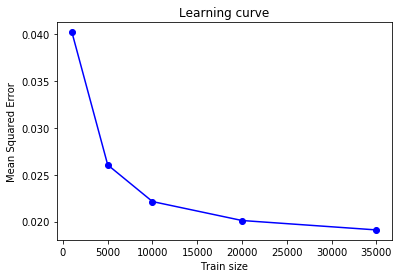

In [20]:
plt.figure()
plt.plot(train_sizes_abs, -test_scores_xgb.mean(1), 'o-', color="b")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curve')
plt.legend(loc="best")

plt.show()